In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data-v1/regular_season.csv")

In [3]:
df.head()

,Unnamed: 0,Rk,Squad,MP,W,D,L,GF,GA,GD,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,season
0,0,1,Manchester City,12,9,1,2,32,12,20,...,24.4,11.1,13.3,1.11,L W W W D,42627.0,Erling Haaland - 13,Ederson,NaN,2023-2024
1,1,2,Liverpool,12,8,3,1,27,10,17,...,26.5,14.5,12.0,1.00,D W W D W,50648.0,Mohamed Salah - 10,Alisson,NaN,2023-2024
2,2,3,Arsenal,12,8,3,1,26,10,16,...,21.0,9.2,11.8,0.99,W D W L W,60130.0,Eddie Nketiah - 5,David Raya,NaN,2023-2024
3,3,4,Tottenham,12,8,2,2,24,15,9,...,19.2,18.6,0.6,0.05,W W W L L,61726.0,Son Heung-min - 8,Guglielmo Vicario,NaN,2023-2024
4,4,5,Aston Villa,12,8,1,3,29,17,12,...,23.5,15.9,7.7,0.64,D W W L W,41378.0,Ollie Watkins - 6,Emiliano Martínez,NaN,2023-2024


In [4]:
df.columns

Index(['Unnamed: 0', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper', 'Notes', 'season'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       688 non-null    int64  
 1   Rk               688 non-null    int64  
 2   Squad            688 non-null    object 
 3   MP               688 non-null    int64  
 4   W                688 non-null    int64  
 5   D                688 non-null    int64  
 6   L                688 non-null    int64  
 7   GF               688 non-null    int64  
 8   GA               688 non-null    int64  
 9   GD               688 non-null    int64  
 10  Pts              688 non-null    int64  
 11  Pts/MP           688 non-null    float64
 12  xG               140 non-null    float64
 13  xGA              140 non-null    float64
 14  xGD              140 non-null    float64
 15  xGD/90           140 non-null    float64
 16  Last 5           20 non-null     object 
 17  Attendance      

### Gereksiz sütunları çıkar

In [6]:
cols = ["Unnamed: 0"]
df.drop(columns=cols,axis=1,inplace=True)

In [7]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,season
0,1,Manchester City,12,9,1,2,32,12,20,28,...,24.4,11.1,13.3,1.11,L W W W D,42627.0,Erling Haaland - 13,Ederson,NaN,2023-2024
1,2,Liverpool,12,8,3,1,27,10,17,27,...,26.5,14.5,12.0,1.00,D W W D W,50648.0,Mohamed Salah - 10,Alisson,NaN,2023-2024
2,3,Arsenal,12,8,3,1,26,10,16,27,...,21.0,9.2,11.8,0.99,W D W L W,60130.0,Eddie Nketiah - 5,David Raya,NaN,2023-2024
3,4,Tottenham,12,8,2,2,24,15,9,26,...,19.2,18.6,0.6,0.05,W W W L L,61726.0,Son Heung-min - 8,Guglielmo Vicario,NaN,2023-2024
4,5,Aston Villa,12,8,1,3,29,17,12,25,...,23.5,15.9,7.7,0.64,D W W L W,41378.0,Ollie Watkins - 6,Emiliano Martínez,NaN,2023-2024


In [8]:
df.corr()

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
Rk,1.000000,1.993910e-02,-0.876363,0.131436,0.857761,-0.744247,0.738426,-9.011099e-01,-0.864737,-0.936725,-0.579668,0.497159,-0.828097,-0.839649,-0.509265
MP,0.019939,1.000000e+00,0.276151,0.454879,0.289048,0.359155,0.410702,-1.921679e-17,0.369225,0.001865,0.674475,0.753157,0.000028,-0.000143,-0.120404
W,-0.876363,2.761509e-01,1.000000,-0.173014,-0.713647,0.890363,-0.571022,9.009301e-01,0.981865,0.930708,0.887879,-0.071943,0.769444,0.726857,0.469667
D,0.131436,4.548791e-01,-0.173014,1.000000,-0.016488,-0.037640,0.147086,-1.077875e-01,0.014365,-0.161262,0.238268,0.494642,-0.165533,-0.147394,-0.185782
L,0.857761,2.890480e-01,-0.713647,-0.016488,1.000000,-0.607591,0.858189,-8.804140e-01,-0.725085,-0.878959,-0.140343,0.862322,-0.737229,-0.701576,-0.492227
GF,-0.744247,3.591549e-01,0.890363,-0.037640,-0.607591,1.000000,-0.351451,8.475273e-01,0.896468,0.810567,0.949460,0.032095,0.743819,0.705181,0.429109
GA,0.738426,4.107022e-01,-0.571022,0.147086,0.858189,-0.351451,1.000000,-7.947574e-01,-0.548894,-0.739264,0.098433,0.933325,-0.595720,-0.569968,-0.436129
GD,-0.901110,-1.921679e-17,0.900930,-0.107787,-0.880414,0.847527,-0.794757,1.000000e+00,0.892344,0.944579,0.663643,-0.562439,0.943049,0.897328,0.525487
Pts,-0.864737,3.692254e-01,0.981865,0.014365,-0.725085,0.896468,-0.548894,8.923436e-01,1.000000,0.915151,0.914160,0.018351,0.725321,0.686003,0.442477
Pts/MP,-0.936725,1.864641e-03,0.930708,-0.161262,-0.878959,0.810567,-0.739264,9.445790e-01,0.915151,1.000000,0.611316,-0.484946,0.844825,0.878103,0.534064


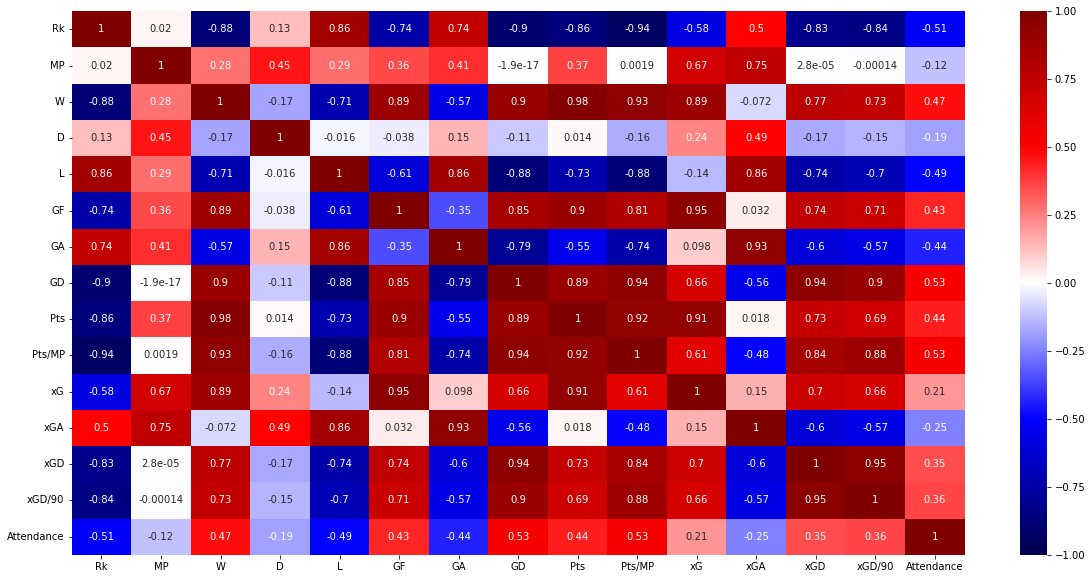

In [9]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [10]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes,season
0,1,Manchester City,12,9,1,2,32,12,20,28,...,24.4,11.1,13.3,1.11,L W W W D,42627.0,Erling Haaland - 13,Ederson,NaN,2023-2024
1,2,Liverpool,12,8,3,1,27,10,17,27,...,26.5,14.5,12.0,1.00,D W W D W,50648.0,Mohamed Salah - 10,Alisson,NaN,2023-2024
2,3,Arsenal,12,8,3,1,26,10,16,27,...,21.0,9.2,11.8,0.99,W D W L W,60130.0,Eddie Nketiah - 5,David Raya,NaN,2023-2024
3,4,Tottenham,12,8,2,2,24,15,9,26,...,19.2,18.6,0.6,0.05,W W W L L,61726.0,Son Heung-min - 8,Guglielmo Vicario,NaN,2023-2024
4,5,Aston Villa,12,8,1,3,29,17,12,25,...,23.5,15.9,7.7,0.64,D W W L W,41378.0,Ollie Watkins - 6,Emiliano Martínez,NaN,2023-2024


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,688.0,10.627907,5.857197,1.00,6.000,11.000,16.0000,22.00
MP,688.0,37.755814,4.655056,12.00,38.000,38.000,38.0000,42.00
W,688.0,13.994186,5.785086,1.00,10.000,13.000,18.0000,32.00
D,688.0,9.767442,3.209518,0.00,8.000,10.000,12.0000,18.00
L,688.0,13.994186,5.526959,0.00,10.000,15.000,18.0000,29.00
GF,688.0,50.386628,15.665311,9.00,40.000,48.000,59.2500,106.00
GA,688.0,50.386628,13.699157,10.00,42.000,51.000,59.0000,100.00
GD,688.0,0.000000,24.164285,-69.00,-16.000,-4.000,15.0000,79.00
Pts,688.0,51.713663,17.149424,4.00,41.000,49.500,62.0000,100.00
Pts/MP,688.0,1.369622,0.428717,0.29,1.080,1.290,1.6600,2.63


## Multicollinearity yüksek olanları çıkar
### - Tercihen toplam olan sonuçları çıkar, ortalama olanların kalması daha yararlı

In [12]:
multicol_cols = ["xG","xGA","xGD","xGD/90","Attendance","Top Team Scorer","Goalkeeper","Notes","Last 5"]
df.drop(columns=multicol_cols,axis=1,inplace=True)

In [13]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,season
0,1,Manchester City,12,9,1,2,32,12,20,28,2.33,2023-2024
1,2,Liverpool,12,8,3,1,27,10,17,27,2.25,2023-2024
2,3,Arsenal,12,8,3,1,26,10,16,27,2.25,2023-2024
3,4,Tottenham,12,8,2,2,24,15,9,26,2.17,2023-2024
4,5,Aston Villa,12,8,1,3,29,17,12,25,2.08,2023-2024


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      688 non-null    int64  
 1   Squad   688 non-null    object 
 2   MP      688 non-null    int64  
 3   W       688 non-null    int64  
 4   D       688 non-null    int64  
 5   L       688 non-null    int64  
 6   GF      688 non-null    int64  
 7   GA      688 non-null    int64  
 8   GD      688 non-null    int64  
 9   Pts     688 non-null    int64  
 10  Pts/MP  688 non-null    float64
 11  season  688 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 64.6+ KB


In [15]:
df.corr()

,Rk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP
Rk,1.000000,1.993910e-02,-0.876363,0.131436,0.857761,-0.744247,0.738426,-9.011099e-01,-0.864737,-0.936725
MP,0.019939,1.000000e+00,0.276151,0.454879,0.289048,0.359155,0.410702,-1.921679e-17,0.369225,0.001865
W,-0.876363,2.761509e-01,1.000000,-0.173014,-0.713647,0.890363,-0.571022,9.009301e-01,0.981865,0.930708
D,0.131436,4.548791e-01,-0.173014,1.000000,-0.016488,-0.037640,0.147086,-1.077875e-01,0.014365,-0.161262
L,0.857761,2.890480e-01,-0.713647,-0.016488,1.000000,-0.607591,0.858189,-8.804140e-01,-0.725085,-0.878959
GF,-0.744247,3.591549e-01,0.890363,-0.037640,-0.607591,1.000000,-0.351451,8.475273e-01,0.896468,0.810567
GA,0.738426,4.107022e-01,-0.571022,0.147086,0.858189,-0.351451,1.000000,-7.947574e-01,-0.548894,-0.739264
GD,-0.901110,-1.921679e-17,0.900930,-0.107787,-0.880414,0.847527,-0.794757,1.000000e+00,0.892344,0.944579
Pts,-0.864737,3.692254e-01,0.981865,0.014365,-0.725085,0.896468,-0.548894,8.923436e-01,1.000000,0.915151
Pts/MP,-0.936725,1.864641e-03,0.930708,-0.161262,-0.878959,0.810567,-0.739264,9.445790e-01,0.915151,1.000000


<AxesSubplot:>

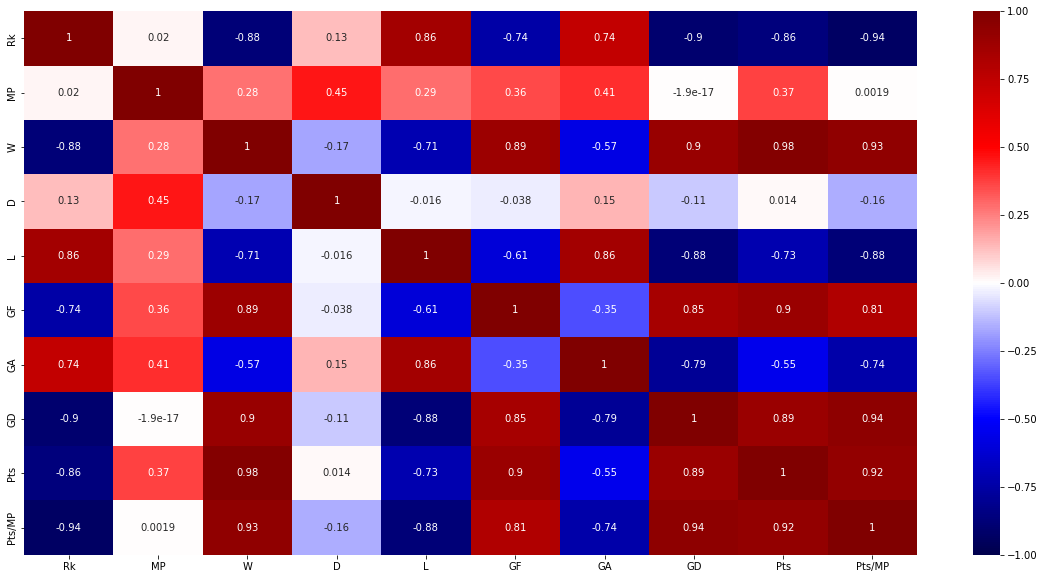

In [16]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [17]:
df.isnull().sum()

Rk        0
Squad     0
MP        0
W         0
D         0
L         0
GF        0
GA        0
GD        0
Pts       0
Pts/MP    0
season    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      688 non-null    int64  
 1   Squad   688 non-null    object 
 2   MP      688 non-null    int64  
 3   W       688 non-null    int64  
 4   D       688 non-null    int64  
 5   L       688 non-null    int64  
 6   GF      688 non-null    int64  
 7   GA      688 non-null    int64  
 8   GD      688 non-null    int64  
 9   Pts     688 non-null    int64  
 10  Pts/MP  688 non-null    float64
 11  season  688 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 64.6+ KB


In [19]:
df = df.iloc[0:140]

In [20]:
df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,season
0,1,Manchester City,12,9,1,2,32,12,20,28,2.33,2023-2024
1,2,Liverpool,12,8,3,1,27,10,17,27,2.25,2023-2024
2,3,Arsenal,12,8,3,1,26,10,16,27,2.25,2023-2024
3,4,Tottenham,12,8,2,2,24,15,9,26,2.17,2023-2024
4,5,Aston Villa,12,8,1,3,29,17,12,25,2.08,2023-2024
...,...,...,...,...,...,...,...,...,...,...,...,...
135,16,Huddersfield,38,9,10,19,28,58,-30,37,0.97,2017-2018
136,17,Southampton,38,7,15,16,37,56,-19,36,0.95,2017-2018
137,18,Swansea City,38,8,9,21,28,56,-28,33,0.87,2017-2018
138,19,Stoke City,38,7,12,19,35,68,-33,33,0.87,2017-2018


In [21]:
df.to_csv("../data-v2/regular_season.csv", encoding='utf-8')